In [1]:
!pip install fcapy[all]
!pip install frozendict
!pip install ipynb
!pip install sparselinear
!pip install bitsets
!pip install bitarray
import torch
!pip install torch-scatter -f https://data.pyg.org/whl/torch-2.0.0+cuda118.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-2.0.0+cuda118.html
!pip install torch-cluster -f https://data.pyg.org/whl/torch-2.0.0+cuda118.html
!pip install git+https://github.com/pyg-team/pytorch_geometric.git
import numpy as np
import pandas as pd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.9/162.9 kB 802.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.8/118.8 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 kB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 30.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 45.0 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=c12ae7d64ca39a523d3b5d23e4ce0c4503b8070820035682f4f9b84550d9778d
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


Looking in links: https://data.pyg.org/whl/torch-2.0.0+cuda118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.0/108.0 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for torch-scatter: filename=torch_scatter-2.1.2-cp310-cp310-linux_x86_64.whl size=495091 sha256=9cf4cafb0e1e5fec59002dc914273b13027c33007921bf2b46d07b312f420cce
  Stored in directory: /root/.cache/pip/wheels/92/f1/2b/3b46d54b134259f58c8363568569053248040859b1a145b3ce
Successfully built torch-scatter
Looking in links: https://data.pyg.org/whl/torch-2.0.0+cuda118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.0/210.0 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for torch-sparse: filename=torch_sparse-0.6.18-cp310-cp310-linux_x86_64.whl size=1035675 sha256=c68d085a9d8582813623a700c64b6cf167fdfe97b471272487487a18c7d5deea
  Stored in directory: /root/.cache/pip/wheels/c9/dd/0f/a6a16f9f3b0236733d257b4b4ea91b548b984a341ed3b8f38c
Successfully buil

In [2]:
from fcapy.context import FormalContext
from fcapy.lattice import ConceptLattice
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, recall_score, accuracy_score, classification_report

In [3]:
from fcapy.visualizer import LineVizNx
import matplotlib.pyplot as plt

plt.rcParams['figure.facecolor'] = (1,1,1,1)

In [4]:
import neural_lib as nl

# Iris DataSet

We will work with iris-setosa

## Step 0. Binarize the data

In [13]:
df = pd.read_csv('IRIS.csv')
df.head()

sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [14]:
# Создание нового DataFrame для бинаризированных данных
df_bin = pd.DataFrame()

In [15]:
step = 1.5 #шаг для бинаризации

In [16]:
# sepal_length
start, finish = df['sepal_length'].min(), df['sepal_length'].max()
for i in np.arange(start, finish, step):
    df_bin[f'sepal_length({i}, {i+step})'] = df['sepal_length'].between(i, i+step, inclusive='left')

# sepal_width
start, finish = df['sepal_width'].min(), df['sepal_width'].max()
for i in np.arange(start, finish, step):
    df_bin[f'sepal_width({i}, {i+step})'] = df['sepal_width'].between(i, i+step, inclusive='left')

# petal_length
start, finish = df['petal_length'].min(), df['petal_length'].max()
for i in np.arange(start, finish, step):
    df_bin[f'petal_length({i}, {i+step})'] = df['petal_length'].between(i, i+step, inclusive='left')

# petal_width
start, finish = df['petal_width'].min(), df['petal_width'].max()
for i in np.arange(start, finish, step):
    df_bin[f'petal_width({i}, {i+step})'] = df['petal_width'].between(i, i+step, inclusive='left')

In [17]:
df_bin['species'] = df['species']

# Добавление идентификаторов
df_bin['sample_id'] = ['iris_' + str(i) for i in range(df_bin.shape[0])]
df_bin.set_index('sample_id', inplace=True)
df_bin['is_setosa'] = df_bin['species'] == 'Iris-setosa'
df_bin.drop('species', axis=1, inplace=True)
df_bin.to_csv('iris_setosa_bin.csv')
df_bin

sepal_length(4.3, 5.8)  sepal_length(5.8, 7.3)  \
sample_id                                                   
iris_0                       True                   False   
iris_1                       True                   False   
iris_2                       True                   False   
iris_3                       True                   False   
iris_4                       True                   False   
...                           ...                     ...   
iris_145                    False                    True   
iris_146                    False                    True   
iris_147                    False                    True   
iris_148                    False                    True   
iris_149                    False                    True   

           sepal_length(7.3, 8.8)  sepal_width(2.0, 3.5)  \
sample_id                                                  
iris_0                      False                  False   
iris_1                      False                   True   
iris_2                      False                   True   
iris_3                      False                   True   
iris_4                      False                  False   
...                           ...                    ...   
iris_145                    False                   True   
iris_146                    False                   True   
iris_147                    False                   True   
iris_148                    False                   True   
iris_149                    False                   True   

           sepal_width(3.5, 5.0)  petal_length(1.0, 2.5)  \
sample_id                                                  
iris_0                      True                    True   
iris_1                     False                    True   
iris_2                     False                    True   
iris_3                     False                    True   
iris_4                      True                    True   
...                          ...                     ...   
iris_145                   False                   False   
iris_146                   False                   False   
iris_147                   False                   False   
iris_148                   False                   False   
iris_149                   False                   False   

           petal_length(2.5, 4.0)  petal_length(4.0, 5.5)  \
sample_id                                                   
iris_0                      False                   False   
iris_1                      False                   False   
iris_2                      False                   False   
iris_3                      False                   False   
iris_4                      False                   False   
...                           ...                     ...   
iris_145                    False                    True   
iris_146                    False                    True   
iris_147                    False                    True   
iris_148                    False                    True   
iris_149                    False                    True   

           petal_length(5.5, 7.0)  petal_width(0.1, 1.6)  \
sample_id                                                  
iris_0                      False                   True   
iris_1                      False                   True   
iris_2                      False                   True   
iris_3                      False                   True   
iris_4                      False                   True   
...                           ...                    ...   
iris_145                    False                  False   
iris_146                    False                  False   
iris_147                    False                  False   
iris_148                    False                  False   
iris_149                    False                  False   

           petal_width(1.6, 3.1)  is_setosa  
sample_id                         

In [18]:
y_feat = 'is_setosa'

In [19]:
df_train, df_test = train_test_split(df_bin, train_size=0.7, random_state=0)
X_train, y_train = df_train.drop(y_feat, axis=1), df_train[y_feat]
X_test, y_test = df_test.drop(y_feat, axis=1), df_test[y_feat]
X_train.describe()

sepal_length(4.3, 5.8) sepal_length(5.8, 7.3) sepal_length(7.3, 8.8)  \
count                     105                    105                    105   
unique                      2                      2                      2   
top                     False                  False                  False   
freq                       54                     58                     98   

       sepal_width(2.0, 3.5) sepal_width(3.5, 5.0) petal_length(1.0, 2.5)  \
count                    105                   105                    105   
unique                     2                     2                      2   
top                     True                 False                  False   
freq                      90                    90                     71   

       petal_length(2.5, 4.0) petal_length(4.0, 5.5) petal_length(5.5, 7.0)  \
count                     105                    105                    105   
unique                      2                      2                      2   
top                     False                  False                  False   
freq                       96                     65                     83   

       petal_width(0.1, 1.6) petal_width(1.6, 3.1)  
count                    105                   105  
unique                     2                     2  
top                     True                 False  
freq                      64                    64

In [20]:
X_test.describe()

sepal_length(4.3, 5.8) sepal_length(5.8, 7.3) sepal_length(7.3, 8.8)  \
count                      45                     45                     45   
unique                      2                      2                      2   
top                     False                  False                  False   
freq                       23                     23                     44   

       sepal_width(2.0, 3.5) sepal_width(3.5, 5.0) petal_length(1.0, 2.5)  \
count                     45                    45                     45   
unique                     2                     2                      2   
top                     True                 False                  False   
freq                      36                    36                     29   

       petal_length(2.5, 4.0) petal_length(4.0, 5.5) petal_length(5.5, 7.0)  \
count                      45                     45                     45   
unique                      2                      2                      2   
top                     False                  False                  False   
freq                       43                     24                     39   

       petal_width(0.1, 1.6) petal_width(1.6, 3.1)  
count                     45                    45  
unique                     2                     2  
top                     True                 False  
freq                      34                    34

## Step 1. Build Monotone Concept Lattice

Put binarized data in FormalContext and compute monotone ConceptLattice

In [ ]:
# Create a Formal Context from the training data
K_train = FormalContext.from_pandas(X_train)

# Print the Formal Context
K_train

FormalContext (105 objects, 11 attributes, 420 connections)
        |sepal_length(4.3, 5.8)|sepal_length(5.8, 7.3)|sepal_length(7.3, 8.8)|sepal_width(2.0, 3.5)|sepal_width(3.5, 5.0)|...|petal_length(2.5, 4.0)|petal_length(4.0, 5.5)|petal_length(5.5, 7.0)|petal_width(0.1, 1.6)|petal_width(1.6, 3.1)|
iris_60 |                     X|                      |                      |                    X|                     |...|                     X|                      |                      |                    X|                     |
iris_116|                      |                     X|                      |                    X|                     |...|                      |                      |                     X|                     |                    X|
iris_144|                      |                     X|                      |                    X|                     |...|                      |                      |                     X|                     |   

In [ ]:
L = ConceptLattice.from_context(K_train, algo = 'Sofia', is_monotone=True)
len(L)

95

Compute F1 score for each formal concept (assuming that an object is predicted True if it is in the extent of the concept)

In [ ]:
for c in L:
    y_preds = np.zeros(K_train.n_objects)
    y_preds[list(c.extent_i)] = 1
    c.measures['f1_score'] = f1_score(y_train, y_preds)

Select indices of the best concepts from the lattice

In [ ]:
concepts_count = 20
best_concepts = list(L.measures['f1_score'].argsort()[::-1][:concepts_count])

assert len({g_i for c in L[best_concepts] for g_i in c.extent_i})==K_train.n_objects, "Selected concepts do not cover all train objects"

Construct neural network based on concept lattice

In [ ]:
cn = nl.ConceptNetwork.from_lattice(L, best_concepts, sorted(set(y_train)))

Setup visuzalier for the architecture

In [ ]:
vis = LineVizNx(
    node_label_font_size=14,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes))+'\n\n',
    edge_cmap="hsv"
    )
set(X_train.columns)

{'petal_length(1.0, 2.5)',
 'petal_length(2.5, 4.0)',
 'petal_length(4.0, 5.5)',
 'petal_length(5.5, 7.0)',
 'petal_width(0.1, 1.6)',
 'petal_width(1.6, 3.1)',
 'sepal_length(4.3, 5.8)',
 'sepal_length(5.8, 7.3)',
 'sepal_length(7.3, 8.8)',
 'sepal_width(2.0, 3.5)',
 'sepal_width(3.5, 5.0)'}

Move the nodes in visualization to make it look pretty

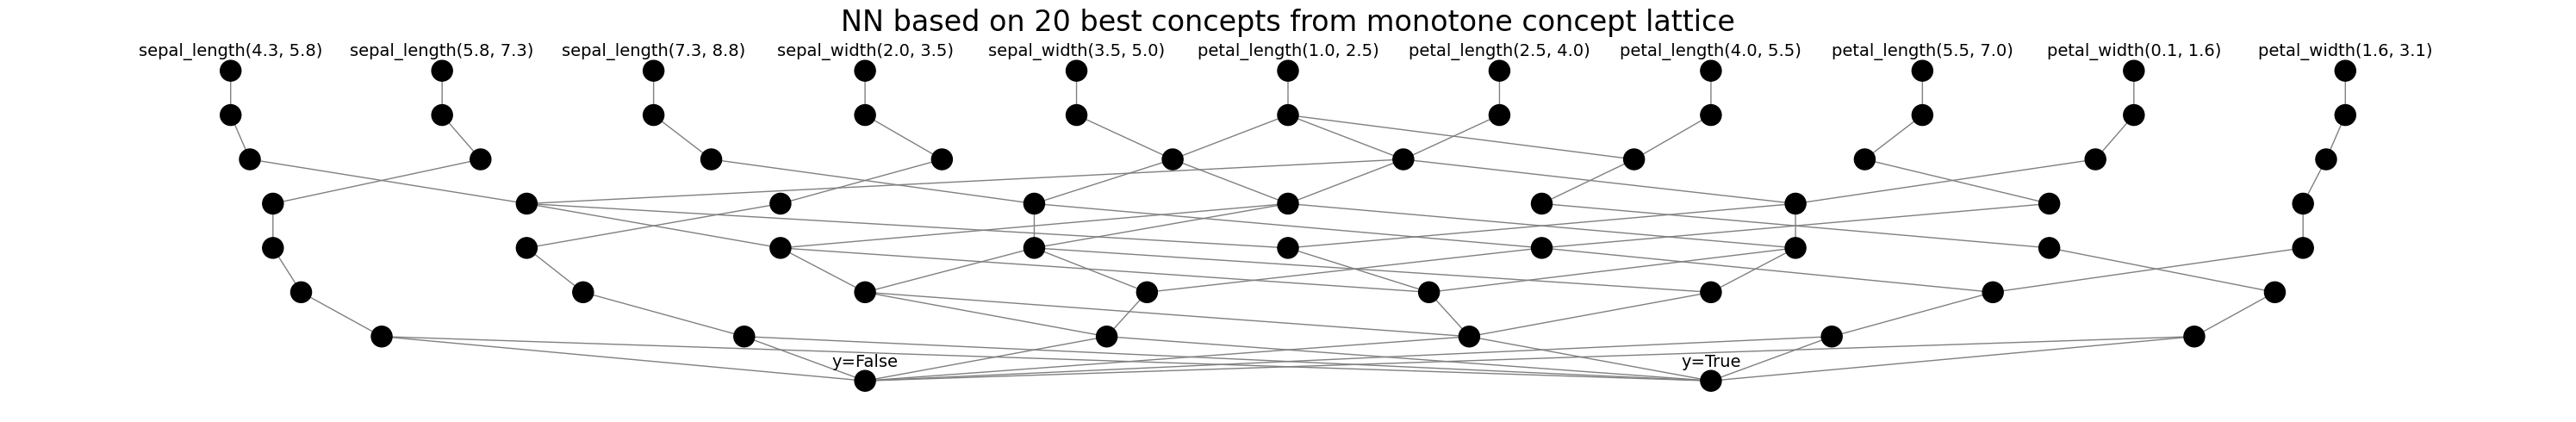

In [ ]:
fig, ax = plt.subplots(figsize=(30, 5))

vis.draw_poset(
    cn.poset, ax=ax, edge_color='grey',
    flg_node_indices=False,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes), only_new_attrs=True)+'\n\n',
    node_color='black',
)

plt.title(f'NN based on {20} best concepts from monotone concept lattice', loc='center', size=24)

plt.subplots_adjust()
plt.tight_layout()
plt.savefig('iris.png')
plt.show()

In [ ]:
import torch
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

#cn = nl.ConceptNetwork.from_lattice(L, best_concepts, sorted(set(y_train)))
cn.fit(X_train, y_train,  n_epochs = 2500, nonlinearity=torch.nn.GELU)

In [ ]:
print('Class predictions \n', cn.predict(X_test).numpy().astype(bool))
print('True classes \n', y_test.values)

Class predictions 
 [False False  True False  True False  True False False False False False
 False False False  True False False  True  True False False  True  True
 False  True  True False False  True False False  True False False False
  True False False False False  True False  True  True]
True classes 
 [False False  True False  True False  True False False False False False
 False False False  True False False  True  True False False  True  True
 False  True  True False False  True False False  True False False False
  True False False False False  True False  True  True]


Now fit the network

In [ ]:
print("F1 score =", f1_score(y_test.values, cn.predict(X_test).numpy()))

F1 score = 1.0


In [ ]:
y_pred = cn.predict(X_test).numpy()
y_proba = cn.predict_proba(X_test).detach().numpy()

print('Recall score:', recall_score(y_test.values.astype('int'), y_pred))
print('F1 score:', f1_score(y_test.values.astype('int'), y_pred))
print('Accuracy score:', accuracy_score(y_test.values.astype('int'), y_pred))

Recall score: 1.0
F1 score: 1.0
Accuracy score: 1.0


To obtain the prediction

In [ ]:
edge_weights = cn.edge_weights_from_network()

Let us look at the fitted weights of edges

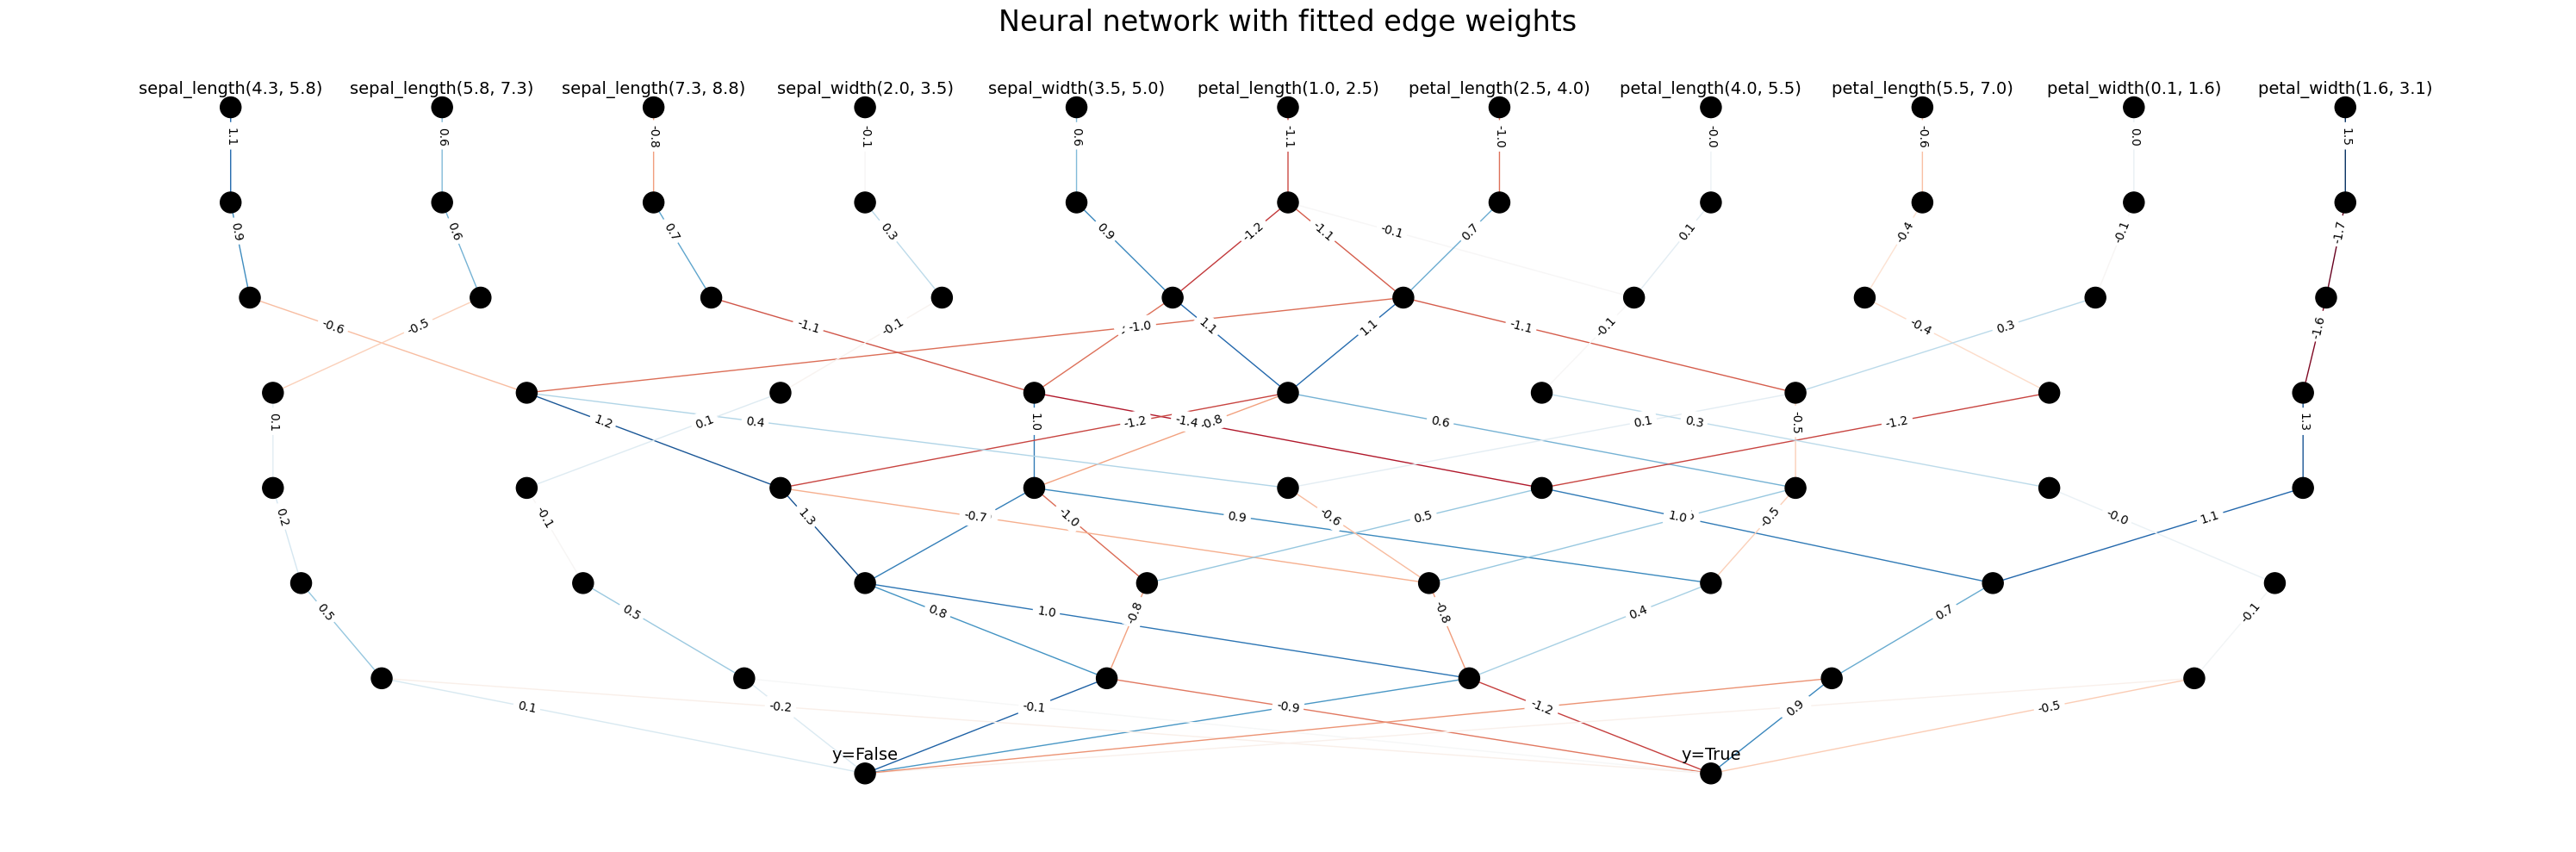

In [ ]:
import networkx as nx
fig, ax = plt.subplots(figsize=(30,10))

vis.draw_poset(
    cn.poset, ax=ax, node_color='black',
    flg_node_indices=False,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes), only_new_attrs=True)+'\n\n',
    edge_color=[edge_weights[edge] for edge in cn.poset.to_networkx().edges],
    edge_cmap=plt.cm.RdBu,
)
nx.draw_networkx_edge_labels(cn.poset.to_networkx(), vis.mover.pos, {k: f"{v:.1f}" for k,v in edge_weights.items()}, label_pos=0.7)

plt.title('Neural network with fitted edge weights', size=24, loc='center')
plt.tight_layout()
plt.subplots_adjust()
plt.savefig('iris_fitted.png')
plt.show()

#  Credit card fraud detection

A very unsuccessful dataset, it is aimed at One-Class classification, so the model takes one class to zero. Because of this, F1_score = 0.
Everything will be much better on the next dataset

I add another dataset (Wine)

In [ ]:
df1 = pd.read_csv('creditcard_2023.csv')
df1.drop(columns='id', inplace=True)
df1 = df1.head(50000) # 560к observations this is too much, let's reduce their number
df1

V1        V2        V3        V4        V5        V6        V7  \
0     -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014   
1      0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
2     -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481  0.743511   
3     -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
4     -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   
...         ...       ...       ...       ...       ...       ...       ...   
49995 -0.164244 -0.212434  0.926673 -1.469786  0.376403  0.322168  0.597508   
49996 -0.943457  0.176330 -0.492186 -0.181533 -0.277748 -0.006467  0.099527   
49997 -0.320219 -0.572996  2.056778 -1.235131  0.145952  0.481686  0.603294   
49998 -0.609149  0.242923 -0.226428 -0.238189 -0.202749 -0.034206  0.252674   
49999  0.556960 -1.115955  0.667611 -1.482794 -0.278937 -0.016164  0.380053   

             V8        V9       V10  ...       V21       V22       V23  \
0     -0.130006  0.727159  0.637735  ... -0.110552  0.217606 -0.134794   
1     -0.133118  0.347452  0.529808  ... -0.194936 -0.605761  0.079469   
2     -0.095576 -0.261297  0.690708  ... -0.005020  0.702906  0.945045   
3     -0.065130 -0.205698  0.575231  ... -0.146927 -0.038212 -0.214048   
4     -0.212660  1.049921  0.968046  ... -0.106984  0.729727 -0.161666   
...         ...       ...       ...  ...       ...       ...       ...   
49995 -0.059621  0.169117  0.182396  ... -0.048453  0.117045 -0.228659   
49996  0.522385  0.144604  0.967535  ... -0.132169  0.331899  0.284364   
49997 -0.145852  0.971825  0.476542  ... -0.168644 -0.035589 -0.166514   
49998  0.332522  0.043025  0.795615  ... -0.023413  0.390157 -0.083498   
49999 -0.183090  2.652414 -0.015829  ... -0.085596 -0.234069 -0.364459   

            V24       V25       V26       V27       V28    Amount  Class  
0      0.165959  0.126280 -0.434824 -0.081230 -0.151045  17982.10      0  
1     -0.577395  0.190090  0.296503 -0.248052 -0.064512   6531.37      0  
2     -1.154666 -0.605564 -0.312895 -0.300258 -0.244718   2513.54      0  
3     -1.893131  1.003963 -0.515950 -0.165316  0.048424   5384.44      0  
4      0.312561 -0.414116  1.071126  0.023712  0.419117  14278.97      0  
...         ...       ...       ...       ...       ...       ...    ...  
49995 -1.092469  0.034253  2.637141 -0.422916 -0.146095   3846.45      0  
49996 -0.766199 -0.207690 -0.757928  0.400338 -0.449968  15431.63      0  
49997  0.189279 -0.110306  1.694308  0.128661 -0.154271  16399.70      0  
49998  0.113793 -0.773968 -0.950010  0.222696 -0.159129  23175.49      0  
49999  0.946095  0.719041 -2.295430 -0.185103  0.116529   4054.08      0  

[50000 rows x 30 columns]

In [ ]:
df1.median()

V1            0.095357
V2           -0.418146
V3            0.938261
V4           -0.539026
V5            0.146702
V6            0.388998
V7            0.406967
V8           -0.139138
V9            0.501127
V10           0.551964
V11          -0.420331
V12           0.598247
V13           0.183961
V14           0.784957
V15           0.224097
V16           0.498844
V17           0.462612
V18           0.266729
V19          -0.241929
V20          -0.186291
V21          -0.130658
V22          -0.118010
V23          -0.075884
V24           0.156950
V25           0.204287
V26          -0.152638
V27          -0.227493
V28          -0.046502
Amount    11885.620000
Class         0.000000
dtype: float64

In [ ]:
df1['Class'].value_counts()

0    49852
1      148
Name: Class, dtype: int64

In [ ]:
"""
import pandas as pd
binary_df1 = df1.copy()

# Бинаризация с разделением каждого числового столбца на 2 столбца
for column in binary_df1.columns[:-1]:  # Проходим по всем столбцам, кроме последнего
    cut_result = pd.cut(binary_df1[column], bins=2, labels=False)
    for i in range(2):
        binary_df1[f"{column}_part_{i+1}"] = (cut_result == i).astype(int)

binary_df1.drop(columns=df1.columns[:-1], inplace=True)
binary_df1 = binary_df1.rename(index=lambda x: f'{x + 1}')
binary_df1
"""

'\nimport pandas as pd\nbinary_df1 = df1.copy()\n\n# Бинаризация с разделением каждого числового столбца на 2 столбца\nfor column in binary_df1.columns[:-1]:  # Проходим по всем столбцам, кроме последнего\n    cut_result = pd.cut(binary_df1[column], bins=2, labels=False)\n    for i in range(2):\n        binary_df1[f"{column}_part_{i+1}"] = (cut_result == i).astype(int)\n\nbinary_df1.drop(columns=df1.columns[:-1], inplace=True)\nbinary_df1 = binary_df1.rename(index=lambda x: f\'{x + 1}\')\nbinary_df1\n'

In [ ]:
import pandas as pd
binary_df1 = df1.copy()

for col in binary_df1.columns[:-1]:
    median_val = binary_df1[col].median()
    binary_df1.loc[:, col] = binary_df1[col] >= median_val

#binary_df1.drop(columns=df1.columns[:-1], inplace=True)
binary_df1 = binary_df1.rename(index=lambda x: f'{x + 1}')
binary_df1

V1     V2     V3     V4     V5     V6     V7     V8     V9    V10  \
1      False  False   True   True  False   True   True   True   True   True   
2       True   True  False   True   True   True  False   True  False  False   
3      False  False   True   True  False   True   True   True  False   True   
4      False  False   True  False   True   True   True   True  False   True   
5      False   True   True   True  False   True   True  False   True   True   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
49996  False   True  False  False   True  False   True   True  False  False   
49997  False   True  False   True  False  False  False   True  False   True   
49998  False  False   True  False  False   True   True  False   True  False   
49999  False   True  False   True  False  False  False   True  False   True   
50000   True  False  False  False  False  False  False  False   True  False   

       ...    V21    V22    V23    V24    V25    V26    V27    V28  Amount  \
1      ...   True   True  False   True  False  False   True  False    True   
2      ...  False  False   True  False  False   True  False  False   False   
3      ...   True   True   True  False  False  False  False  False   False   
4      ...  False   True  False  False   True  False   True   True   False   
5      ...   True   True  False   True  False   True   True   True    True   
...    ...    ...    ...    ...    ...    ...    ...    ...    ...     ...   
49996  ...   True   True  False  False  False   True  False  False   False   
49997  ...  False   True   True  False  False  False   True  False    True   
49998  ...  False   True  False   True  False   True   True  False    True   
49999  ...   True   True  False  False  False  False   True  False    True   
50000  ...   True  False  False   True   True  False   True   True   False   

       Class  
1          0  
2          0  
3          0  
4          0  
5          0  
...      ...  
49996      0  
49997      0  
49998      0  
49999      0  
50000      0  

[50000 rows x 30 columns]

In [ ]:
y_feat = 'Class'

In [ ]:
df_train, df_test = train_test_split(binary_df1, train_size=0.7, random_state=0)
X_train, y_train = df_train.drop(y_feat, axis=1), df_train[y_feat]
X_test, y_test = df_test.drop(y_feat, axis=1), df_test[y_feat]

# 1, 0 -> bool
X_train = X_train.astype(bool)
X_test = X_test.astype(bool)
X_train.describe()

V1     V2     V3     V4     V5     V6     V7     V8     V9    V10  \
count   35000  35000  35000  35000  35000  35000  35000  35000  35000  35000   
unique      2      2      2      2      2      2      2      2      2      2   
top     False   True   True  False   True   True   True  False   True  False   
freq    17646  17541  17519  17532  17592  17558  17576  17534  17513  17577   

        ...    V20    V21    V22    V23    V24    V25    V26    V27    V28  \
count   ...  35000  35000  35000  35000  35000  35000  35000  35000  35000   
unique  ...      2      2      2      2      2      2      2      2      2   
top     ...   True  False   True  False   True  False   True  False  False   
freq    ...  17528  17536  17521  17502  17537  17564  17510  17563  17516   

       Amount  
count   35000  
unique      2  
top     False  
freq    17612  

[4 rows x 29 columns]

In [ ]:
X_test.describe()

V1     V2     V3     V4     V5     V6     V7     V8     V9    V10  \
count   15000  15000  15000  15000  15000  15000  15000  15000  15000  15000   
unique      2      2      2      2      2      2      2      2      2      2   
top      True  False  False   True  False  False  False   True  False   True   
freq     7646   7541   7519   7532   7592   7558   7576   7534   7513   7577   

        ...    V20    V21    V22    V23    V24    V25    V26    V27    V28  \
count   ...  15000  15000  15000  15000  15000  15000  15000  15000  15000   
unique  ...      2      2      2      2      2      2      2      2      2   
top     ...  False   True  False   True  False   True  False   True   True   
freq    ...   7528   7536   7521   7502   7537   7564   7510   7563   7516   

       Amount  
count   15000  
unique      2  
top      True  
freq     7612  

[4 rows x 29 columns]

In [ ]:
# Create a Formal Context from the training data
K_train = FormalContext.from_pandas(X_train)

# Print the Formal Context
K_train

FormalContext (35000 objects, 29 attributes, 507075 connections)
     |V1|V2|V3|V4|V5|...|V25|V26|V27|V28|Amount|
17968| X|  |  |  |  |...|  X|   |  X|  X|      |
32392|  | X| X|  | X|...|   |  X|   |   |     X|
9342 | X|  |  | X| X|...|  X|   |   |   |      |
7930 | X|  |  |  |  |...|  X|  X|   |   |     X|
46545|  |  | X| X| X|...|   |  X|   |  X|      |
4150 | X|  |  |  | X|...|  X|   |   |   |     X|
33427| X|  |  |  |  |...|  X|  X|  X|  X|     X|
3003 | X|  |  |  |  |...|  X|  X|   |  X|     X|
6975 | X| X|  | X|  |...|  X|  X|   |   |     X|
16865| X| X|  | X| X|...|  X|  X|   |  X|     X|
................................................
................................................
46885|  | X|  | X|  |...|   |   |  X|   |     X|
20758| X|  | X|  |  |...|   |   |  X|  X|      |
41994|  |  | X|  | X|...|   |   |  X|   |     X|
32104| X| X|  | X| X|...|   |  X|   |  X|      |
30404| X|  |  | X|  |...|  X|  X|   |  X|     X|
21244| X|  |  |  |  |...|  X|  X|   |  X|      |
4589

In [ ]:
L = ConceptLattice.from_context(K_train, algo = 'Sofia', is_monotone=True)
len(L)

101

In [ ]:
for c in L:
    y_preds = np.zeros(K_train.n_objects)
    y_preds[list(c.extent_i)] = 1
    c.measures['f1_score'] = f1_score(y_train, y_preds)
    c.measures['recall_score'] = recall_score(y_train, y_preds)

In [ ]:
concepts_count = 50
best_concepts = list(L.measures['f1_score'].argsort()[::-1][:concepts_count])

assert len({g_i for c in L[best_concepts] for g_i in c.extent_i}) == K_train.n_objects, "Selected concepts do not cover all train objects"

In [ ]:
cn = nl.ConceptNetwork.from_lattice(L, best_concepts, sorted(set(y_train)))

In [ ]:
vis = LineVizNx(
    node_label_font_size=14,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes))+'\n\n',
    edge_cmap="hsv"
    )
set(X_train.columns)

{'Amount',
 'V1',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V2',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9'}

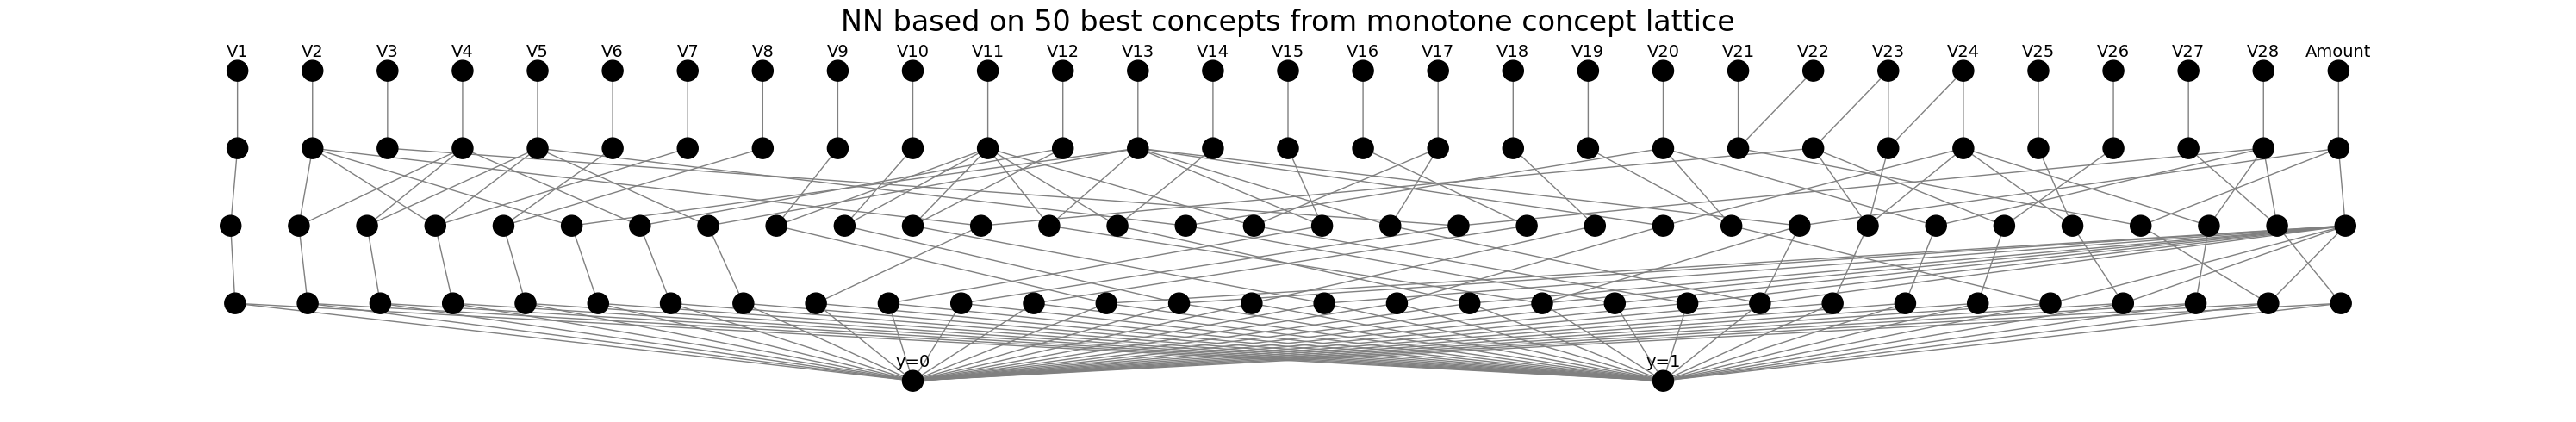

In [ ]:
fig, ax = plt.subplots(figsize=(30,5))

vis.draw_poset(
    cn.poset, ax=ax, edge_color='grey',
    flg_node_indices=False,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes), only_new_attrs=True)+'\n\n',
    node_color='black',
)

plt.title(f'NN based on {concepts_count} best concepts from monotone concept lattice', loc='center', size=24)

plt.subplots_adjust()
plt.tight_layout()
plt.savefig('credit.png')
plt.show()

In [ ]:
import torch
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
cn = nl.ConceptNetwork.from_lattice(L, best_concepts, sorted(set(y_train)))
cn.fit(X_train, y_train,  n_epochs = 400, nonlinearity=torch.nn.GELU)

In [ ]:
print('Class predictions \n', cn.predict(X_test).numpy().astype(bool))
print('True classes \n', y_test.values)

Class predictions 
 [False False False ... False False False]
True classes 
 [1 0 0 ... 0 0 0]


In [ ]:
print("F1 score =", f1_score(y_test.values, cn.predict(X_test).numpy()))

F1 score = 0.0


In [ ]:
y_pred = cn.predict(X_test).numpy()
y_proba = cn.predict_proba(X_test).detach().numpy()

print('Recall score:', recall_score(y_test.values.astype('int'), y_pred))
print('F1 score:', f1_score(y_test.values.astype('int'), y_pred))
print('Accuracy score:', accuracy_score(y_test.values.astype('int'), y_pred))

Recall score: 0.0
F1 score: 0.0
Accuracy score: 0.9969333333333333


In [ ]:
edge_weights = cn.edge_weights_from_network()

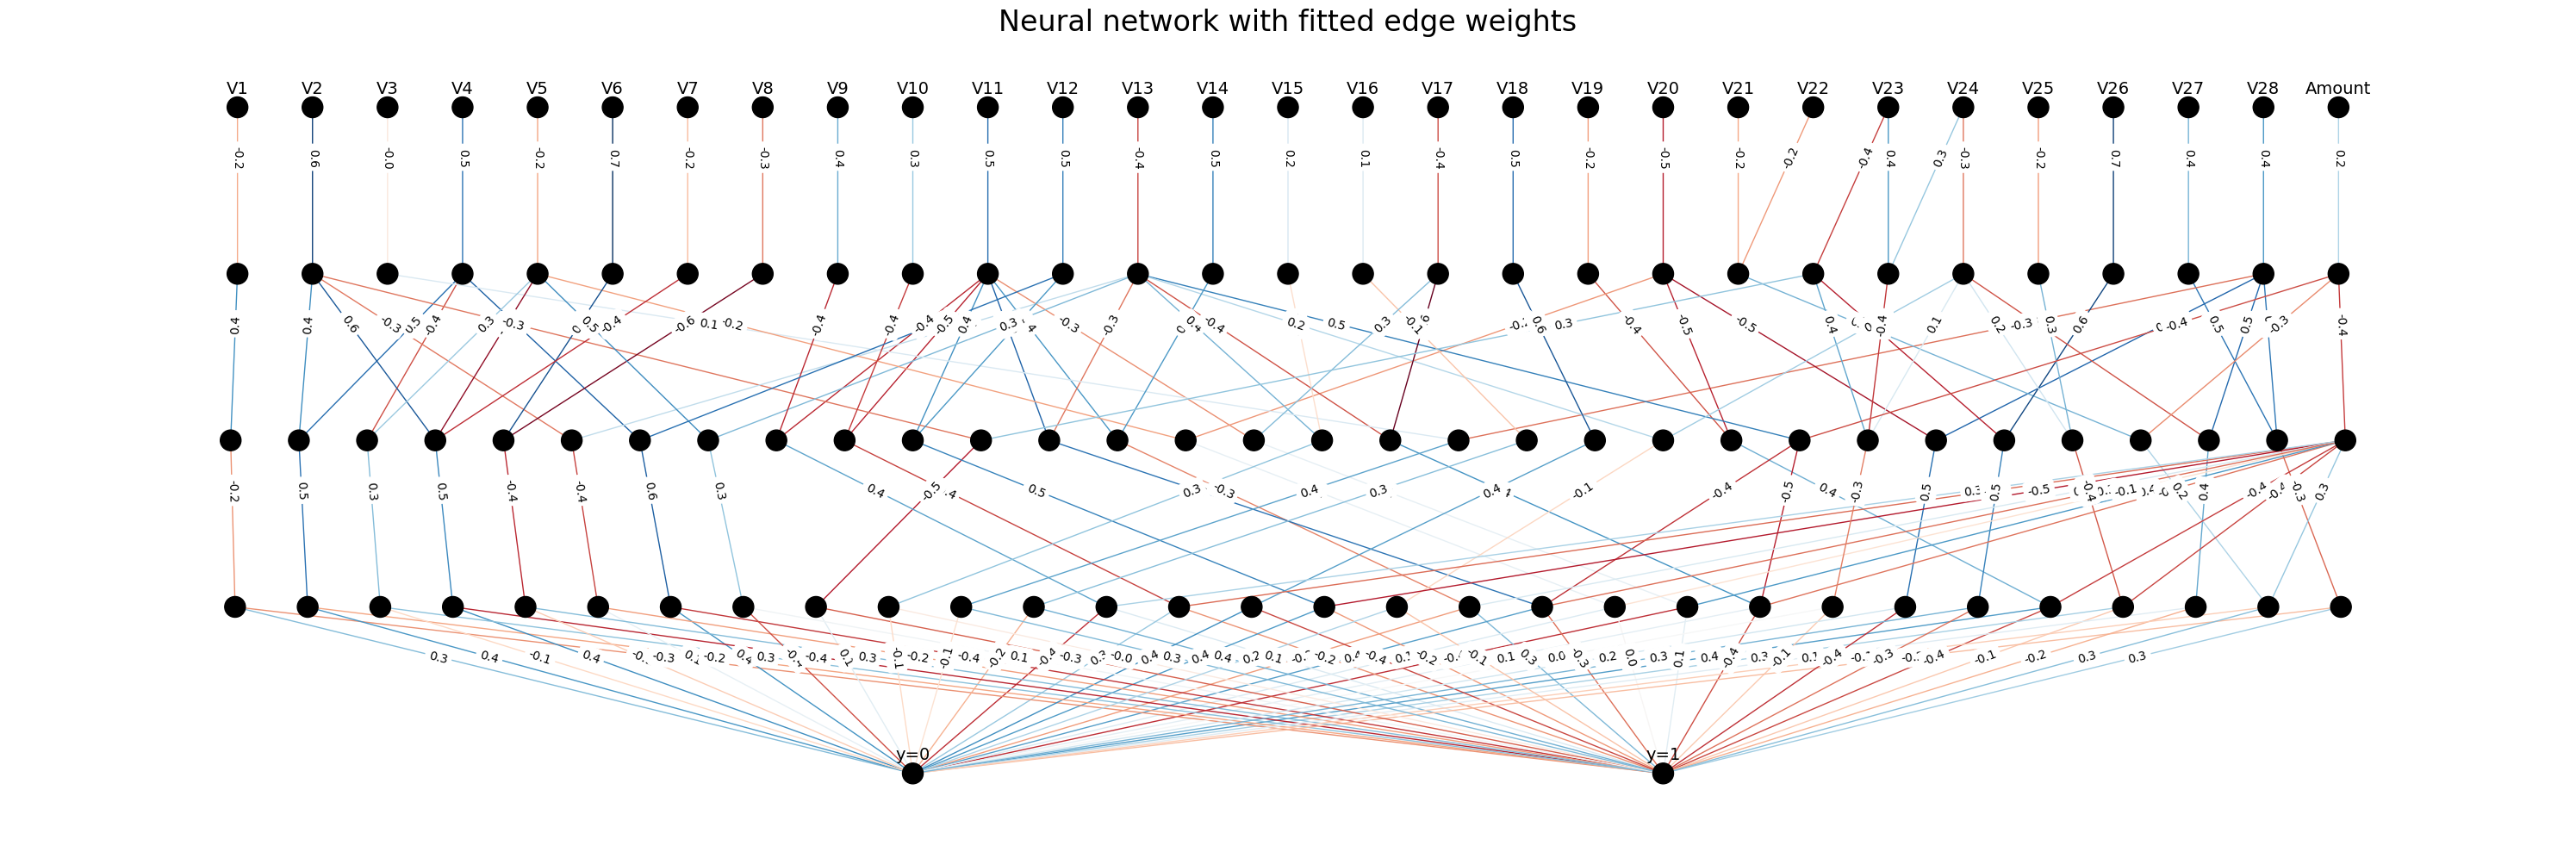

In [ ]:
import networkx as nx
fig, ax = plt.subplots(figsize=(30,10))

vis.draw_poset(
    cn.poset, ax=ax, node_color='black',
    flg_node_indices=False,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes), only_new_attrs=True)+'\n\n',
    edge_color=[edge_weights[edge] for edge in cn.poset.to_networkx().edges],
    edge_cmap=plt.cm.RdBu,
)
nx.draw_networkx_edge_labels(cn.poset.to_networkx(), vis.mover.pos, {k: f"{v:.1f}" for k,v in edge_weights.items()}, label_pos=0.7)

plt.title('Neural network with fitted edge weights', size=24, loc='center')
plt.tight_layout()
plt.subplots_adjust()
plt.savefig('credit_fitted.png')
plt.show()

# 70k+ Job Applicants Data (Human Resource)


In [21]:
df1 = pd.read_csv('stackoverflow_full.csv')
df1.drop(columns='Unnamed: 0', inplace=True)
df1 = df1.head(1000) # 76к observations this is too much, let's reduce their number
df1

Age Accessibility        EdLevel  Employment Gender MentalHealth  \
0    <35            No         Master           1    Man           No   
1    <35            No  Undergraduate           1    Man           No   
2    <35            No         Master           1    Man           No   
3    <35            No  Undergraduate           1    Man           No   
4    >35            No            PhD           0    Man           No   
..   ...           ...            ...         ...    ...          ...   
995  <35            No  Undergraduate           1    Man           No   
996  <35            No         Master           1    Man           No   
997  >35            No         Master           0    Man           No   
998  >35            No            PhD           1    Man           No   
999  <35            No  Undergraduate           0    Man          Yes   

    MainBranch  YearsCode  YearsCodePro             Country  PreviousSalary  \
0          Dev          7             4              Sweden         51552.0   
1          Dev         12             5               Spain         46482.0   
2          Dev         15             6             Germany         77290.0   
3          Dev          9             6              Canada         46135.0   
4       NotDev         40            30           Singapore        160932.0   
..         ...        ...           ...                 ...             ...   
995        Dev          6             2               Egypt         11544.0   
996        Dev          9             5             Romania         35280.0   
997        Dev         20            15            Portugal         95126.0   
998        Dev         25            15              France         81074.0   
999     NotDev         25             9  Russian Federation         41520.0   

                                        HaveWorkedWith  ComputerSkills  \
0                            C++;Python;Git;PostgreSQL               4   
1    Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...              12   
2               C;C++;Java;Perl;Ruby;Git;Ruby on Rails               7   
3    Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...              13   
4                                           C++;Python               2   
..                                                 ...             ...   
995                                  Python;Docker;Git               3   
996  Bash/Shell;C#;PowerShell;Python;SQL;Git;ASP.NE...              12   
997  Assembly;C;C#;C++;HTML/CSS;JavaScript;Matlab;P...              25   
998  Bash/Shell;Elixir;Python;SQL;Ansible;Docker;Gi...              12   
999  Bash/Shell;Groovy;Java;Kotlin;Python;SQL;Docke...              10   

     Employed  
0           0  
1           1  
2           0  
3           0  
4           0  
..        ...  
995         0  
996         1  
997         1  
998         0  
999         0  

[1000 rows x 14 columns]

In [22]:
df1['Employed'].value_counts()

0    503
1    497
Name: Employed, dtype: int64

In [23]:
df = df1.drop(columns=['HaveWorkedWith']) # Получим 70к+ признаков, если применим OHE к этому столбцу
df = df.drop(columns=['Country']) # Получим не интерпретируемую картину, если применим OHE к этому столбцу, лучше без него

In [24]:
import pandas as pd

# One-Hot Encoding для бинаризации категориальных
df_encoded = pd.get_dummies(df, drop_first=True)

# Порог для числовых (среднее)
numerical_cols = ['Employment', 'YearsCode', 'YearsCodePro', 'PreviousSalary', 'ComputerSkills']
threshold = df[numerical_cols].mean()

for col in numerical_cols:
    df_encoded[col + '_bin'] = (df[col] > threshold[col])

# 0 и 1 -> True и False
df_encoded = df_encoded.astype(bool)

df_encoded.reset_index(drop=True, inplace=True)
df_encoded.index = 'employ' + (df_encoded.index + 1).astype(str)
df_encoded.to_csv('job_bin.csv')
df_encoded

Employment  YearsCode  YearsCodePro  PreviousSalary  \
employ1           True       True          True            True   
employ2           True       True          True            True   
employ3           True       True          True            True   
employ4           True       True          True            True   
employ5          False       True          True            True   
...                ...        ...           ...             ...   
employ996         True       True          True            True   
employ997         True       True          True            True   
employ998        False       True          True            True   
employ999         True       True          True            True   
employ1000       False       True          True            True   

            ComputerSkills  Employed  Age_>35  Accessibility_Yes  \
employ1               True     False    False              False   
employ2               True      True    False              False   
employ3               True     False    False              False   
employ4               True     False    False              False   
employ5               True     False     True              False   
...                    ...       ...      ...                ...   
employ996             True     False    False              False   
employ997             True      True    False              False   
employ998             True      True     True              False   
employ999             True     False     True              False   
employ1000            True     False    False              False   

            EdLevel_NoHigherEd  EdLevel_Other  ...  EdLevel_Undergraduate  \
employ1                  False          False  ...                  False   
employ2                  False          False  ...                   True   
employ3                  False          False  ...                  False   
employ4                  False          False  ...                   True   
employ5                  False          False  ...                  False   
...                        ...            ...  ...                    ...   
employ996                False          False  ...                   True   
employ997                False          False  ...                  False   
employ998                False          False  ...                  False   
employ999                False          False  ...                  False   
employ1000               False          False  ...                   True   

            Gender_NonBinary  Gender_Woman  MentalHealth_Yes  \
employ1                False         False             False   
employ2                False         False             False   
employ3                False         False             False   
employ4                False         False             False   
employ5                False         False             False   
...                      ...           ...               ...   
employ996              False         False             False   
employ997              False         False             False   
employ998              False         False             False   
employ999              False         False             False   
employ1000             False         False              True   

            MainBranch_NotDev  Employment_bin  YearsCode_bin  \
employ1                 False            True          False   
employ2                 False            True          False   
employ3                 False            True           True   
employ4                 False            True          False   
employ5                  True           False           True   
...                       ...             ...            ...   
employ996               False            True          False   
employ997               False            True          False   
employ998               False           False           True   
employ999               False            True           

In [ ]:
y_feat = 'Employed'
df_train, df_test = train_test_split(df_encoded, train_size=0.7, random_state=0)
X_train, y_train = df_train.drop(y_feat, axis=1), df_train[y_feat]
X_test, y_test = df_test.drop(y_feat, axis=1), df_test[y_feat]
X_train.describe()

Employment YearsCode YearsCodePro PreviousSalary ComputerSkills  \
count         700       700          700            700            700   
unique          2         1            2              1              1   
top          True      True         True           True           True   
freq          604       700          677            700            700   

       Age_>35 Accessibility_Yes EdLevel_NoHigherEd EdLevel_Other EdLevel_PhD  \
count      700               700                700           700         700   
unique       2                 2                  2             2           2   
top      False             False              False         False       False   
freq       490               683                668           591         672   

       EdLevel_Undergraduate Gender_NonBinary Gender_Woman MentalHealth_Yes  \
count                    700              700          700              700   
unique                     2                2            2                2   
top                    False            False        False            False   
freq                     373              691          678              571   

       MainBranch_NotDev Employment_bin YearsCode_bin YearsCodePro_bin  \
count                700            700           700              700   
unique                 2              2             2                2   
top                False           True         False            False   
freq                 627            604           422              450   

       PreviousSalary_bin ComputerSkills_bin  
count                 700                700  
unique                  2                  2  
top                 False              False  
freq                  419                377

In [ ]:
X_test.describe()

Employment YearsCode YearsCodePro PreviousSalary ComputerSkills  \
count         300       300          300            300            300   
unique          2         1            2              1              1   
top          True      True         True           True           True   
freq          263       300          291            300            300   

       Age_>35 Accessibility_Yes EdLevel_NoHigherEd EdLevel_Other EdLevel_PhD  \
count      300               300                300           300         300   
unique       2                 2                  2             2           2   
top      False             False              False         False       False   
freq       197               288                289           258         283   

       EdLevel_Undergraduate Gender_NonBinary Gender_Woman MentalHealth_Yes  \
count                    300              300          300              300   
unique                     2                2            2                2   
top                    False            False        False            False   
freq                     151              296          290              244   

       MainBranch_NotDev Employment_bin YearsCode_bin YearsCodePro_bin  \
count                300            300           300              300   
unique                 2              2             2                2   
top                False           True         False            False   
freq                 270            263           172              172   

       PreviousSalary_bin ComputerSkills_bin  
count                 300                300  
unique                  2                  2  
top                 False               True  
freq                  168                151

In [ ]:
# Create a Formal Context from the training data
K_train = FormalContext.from_pandas(X_train)

# Print the Formal Context
K_train

FormalContext (700 objects, 20 attributes, 6073 connections)
         |Employment|YearsCode|YearsCodePro|PreviousSalary|ComputerSkills|...|Employment_bin|YearsCode_bin|YearsCodePro_bin|PreviousSalary_bin|ComputerSkills_bin|
employ106|         X|        X|           X|             X|             X|...|             X|             |                |                 X|                  |
employ69 |         X|        X|           X|             X|             X|...|             X|             |                |                  |                 X|
employ480|         X|        X|           X|             X|             X|...|             X|            X|               X|                 X|                  |
employ400|         X|        X|           X|             X|             X|...|             X|            X|                |                 X|                 X|
employ435|         X|        X|           X|             X|             X|...|             X|             |                |

In [ ]:
L = ConceptLattice.from_context(K_train, algo = 'Sofia', is_monotone=True)
len(L)

98

In [ ]:
for c in L:
    y_preds = np.zeros(K_train.n_objects)
    y_preds[list(c.extent_i)] = 1
    c.measures['f1_score'] = f1_score(y_train, y_preds)
    c.measures['recall_score'] = recall_score(y_train, y_preds)

In [ ]:
concepts_count = 50
best_concepts = list(L.measures['f1_score'].argsort()[::-1][:concepts_count])

assert len({g_i for c in L[best_concepts] for g_i in c.extent_i})==K_train.n_objects, "Selected concepts do not cover all train objects"

In [ ]:
cn = nl.ConceptNetwork.from_lattice(L, best_concepts, sorted(set(y_train)))

In [ ]:
vis = LineVizNx(
    node_label_font_size=14,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes))+'\n\n',
    edge_cmap="hsv"
    )
set(X_train.columns)

{'Accessibility_Yes',
 'Age_>35',
 'ComputerSkills',
 'ComputerSkills_bin',
 'EdLevel_NoHigherEd',
 'EdLevel_Other',
 'EdLevel_PhD',
 'EdLevel_Undergraduate',
 'Employment',
 'Employment_bin',
 'Gender_NonBinary',
 'Gender_Woman',
 'MainBranch_NotDev',
 'MentalHealth_Yes',
 'PreviousSalary',
 'PreviousSalary_bin',
 'YearsCode',
 'YearsCodePro',
 'YearsCodePro_bin',
 'YearsCode_bin'}

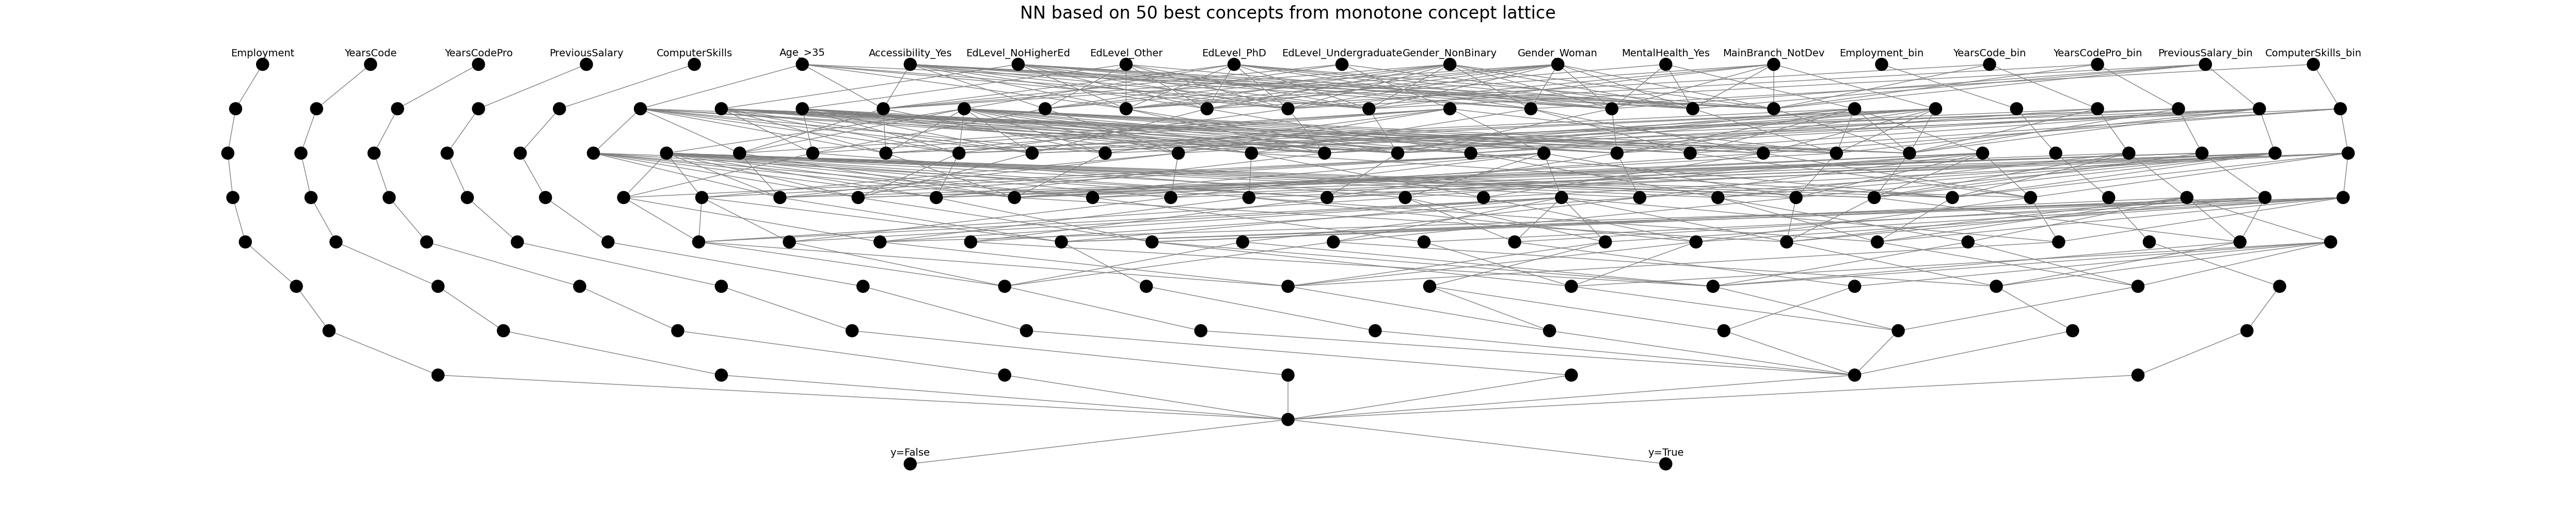

In [ ]:
fig, ax = plt.subplots(figsize=(50,10))

vis.draw_poset(
    cn.poset, ax=ax, edge_color='grey',
    flg_node_indices=False,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes), only_new_attrs=True)+'\n\n',
    node_color='black',
)

plt.title(f'NN based on {concepts_count} best concepts from monotone concept lattice', loc='center', size=24)

plt.subplots_adjust()
plt.tight_layout()
plt.savefig('job.png')
plt.show()

In [ ]:
import torch
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
cn = nl.ConceptNetwork.from_lattice(L, best_concepts, sorted(set(y_train)))
cn.fit(X_train, y_train,  n_epochs = 2500, nonlinearity=torch.nn.GELU)

In [ ]:
print('Class predictions \n', cn.predict(X_test).numpy().astype(bool))
print('True classes \n', y_test.values)

Class predictions 
 [ True  True False  True  True False False  True  True False False  True
 False False  True  True  True False False  True False False False  True
  True  True  True  True  True False  True False False  True False False
 False False False False  True False False  True  True False False  True
 False False False False False False  True  True  True False  True  True
  True False  True False False False False False False  True  True False
  True False False  True  True  True False False False  True  True False
  True False  True  True False False  True  True  True  True False False
 False  True  True False False False  True  True  True False  True  True
  True  True  True False False False False  True False False  True  True
  True False False False  True False False  True False False  True  True
 False False False False  True False False  True False  True  True  True
  True False False  True  True  True False  True False False  True False
  True  True False  True False 

In [ ]:
print("F1 score =", f1_score(y_test.values, cn.predict(X_test).numpy()))

F1 score = 0.8000000000000002


In [ ]:
y_pred = cn.predict(X_test).numpy()
y_proba = cn.predict_proba(X_test).detach().numpy()

print('Recall score:', recall_score(y_test.values.astype('int'), y_pred))
print('F1 score:', f1_score(y_test.values.astype('int'), y_pred))
print('Accuracy score:', accuracy_score(y_test.values.astype('int'), y_pred))

Recall score: 0.7973856209150327
F1 score: 0.8000000000000002
Accuracy score: 0.7966666666666666


In [ ]:
edge_weights = cn.edge_weights_from_network()

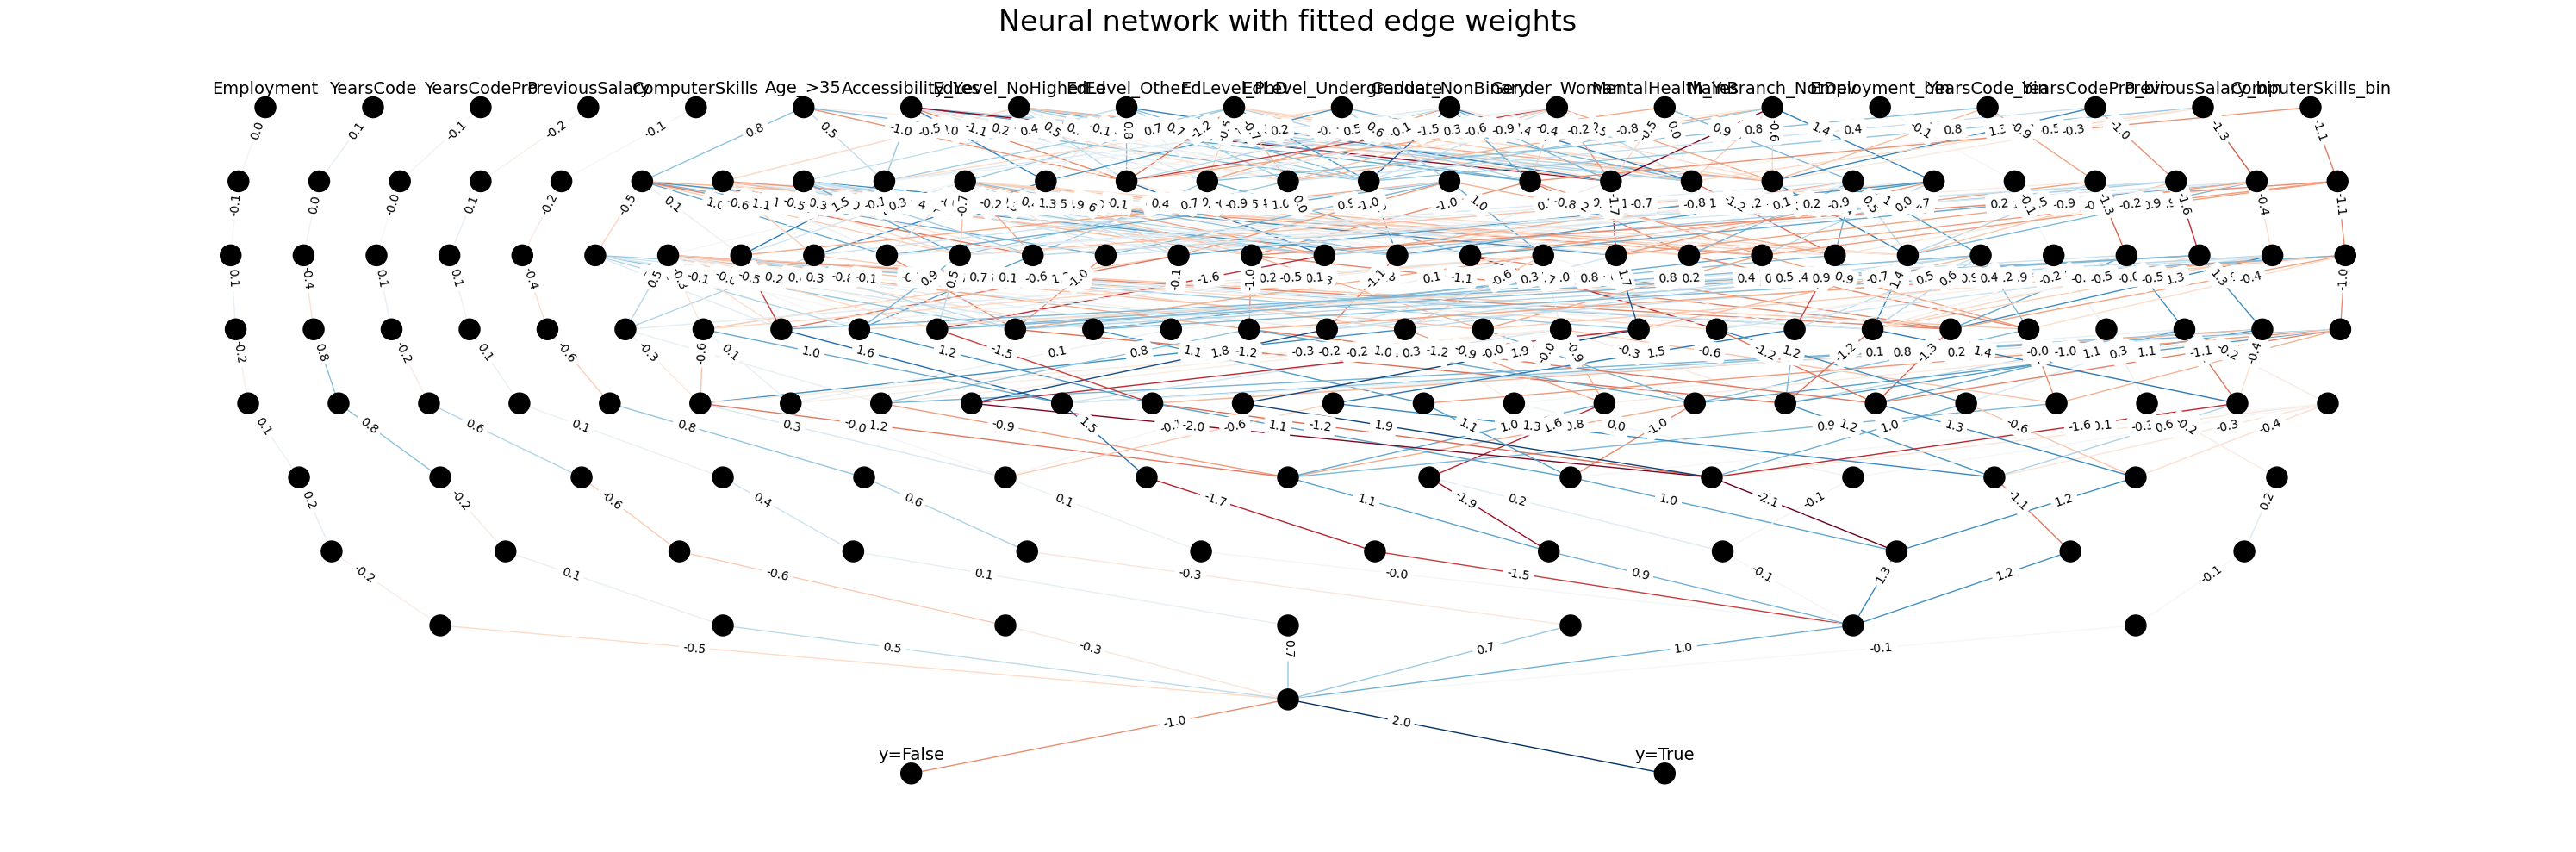

In [ ]:
import networkx as nx
fig, ax = plt.subplots(figsize=(30,10))

vis.draw_poset(
    cn.poset, ax=ax, node_color='black',
    flg_node_indices=False,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes), only_new_attrs=True)+'\n\n',
    edge_color=[edge_weights[edge] for edge in cn.poset.to_networkx().edges],
    edge_cmap=plt.cm.RdBu,
)
nx.draw_networkx_edge_labels(cn.poset.to_networkx(), vis.mover.pos, {k: f"{v:.1f}" for k,v in edge_weights.items()}, label_pos=0.7)

plt.title('Neural network with fitted edge weights', size=24, loc='center')
plt.tight_layout()
plt.subplots_adjust()
plt.savefig('job_fitted.png')
plt.show()

# Wine

In [25]:
!pip3 install -U ucimlrepo

In [26]:
from ucimlrepo import fetch_ucirepo
from sklearn.utils import shuffle

wine = fetch_ucirepo(id=109)
X = wine.data.features
y = wine.data.targets

In [27]:
#make binary from multiclass

idx = y[y == 3].dropna().index

X = X.drop(idx)
y = y.drop(idx)

In [28]:
y['class'] = y['class'] == 1

In [ ]:
sh_data = shuffle(pd.concat([X, y], axis=1))
df = sh_data.iloc[:129]
X = df.drop(columns=['class'], axis=1)
y = df['class']

In [ ]:
#binarization by median value

for col in X.columns:
    median_val = X[col].median()
    X.loc[:, col] = X[col] >= median_val

In [ ]:
X.reset_index(drop=True, inplace=True)
X.index = 'wine' + (X.index + 1).astype(str)
y.reset_index(drop=True, inplace=True)
y.index = 'wine' + (y.index + 1).astype(str)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.describe()

Alcohol Malicacid   Ash Alcalinity_of_ash Magnesium Total_phenols  \
count       90        90    90                90        90            90   
unique       2         2     2                 2         2             2   
top       True      True  True              True      True          True   
freq        46        50    52                47        52            47   

       Flavanoids Nonflavanoid_phenols Proanthocyanins Color_intensity   Hue  \
count          90                   90              90              90    90   
unique          2                    2               2               2     2   
top         False                 True            True            True  True   
freq           45                   50              48              49    46   

       0D280_0D315_of_diluted_wines Proline  
count                            90      90  
unique                            2       2  
top                           False    True  
freq                             48      48

In [ ]:
X_test.describe()

Alcohol Malicacid    Ash Alcalinity_of_ash Magnesium Total_phenols  \
count       39        39     39                39        39            39   
unique       2         2      2                 2         2             2   
top      False     False  False              True     False         False   
freq        20        23     26                20        23            20   

       Flavanoids Nonflavanoid_phenols Proanthocyanins Color_intensity   Hue  \
count          39                   39              39              39    39   
unique          2                    2               2               2     2   
top          True                 True           False           False  True   
freq           20                   21              22              23    21   

       0D280_0D315_of_diluted_wines Proline  
count                            39      39  
unique                            2       2  
top                            True   False  
freq                             23      22

In [ ]:
K_train = FormalContext.from_pandas(X_train)
K_train

FormalContext (90 objects, 13 attributes, 622 connections)
       |Alcohol|Malicacid|Ash|Alcalinity_of_ash|Magnesium|...|Proanthocyanins|Color_intensity|Hue|0D280_0D315_of_diluted_wines|Proline|
wine23 |      X|         |   |                 |         |...|               |              X|   |                            |      X|
wine45 |       |        X|   |                 |         |...|              X|               |  X|                            |       |
wine66 |       |         |  X|                X|         |...|               |               |   |                           X|       |
wine97 |      X|        X|  X|                 |        X|...|              X|              X|  X|                            |      X|
wine31 |      X|        X|  X|                X|        X|...|              X|              X|   |                           X|      X|
wine63 |      X|        X|  X|                X|        X|...|              X|              X|   |                           

In [ ]:
L = ConceptLattice.from_context(K_train, algo = 'Sofia', is_monotone=True)
len(L)

75

In [ ]:
for c in L:
    y_preds = np.zeros(K_train.n_objects)
    y_preds[list(c.extent_i)] = 1
    c.measures['f1_score'] = f1_score(y_train, y_preds)

In [ ]:
concepts_count = 50
best_concepts = list(L.measures['f1_score'].argsort()[::-1][:concepts_count])

assert len({g_i for c in L[best_concepts] for g_i in c.extent_i})==K_train.n_objects, "Selected concepts do not cover all train objects"

In [ ]:
cn = nl.ConceptNetwork.from_lattice(L, best_concepts, sorted(set(y_train)))

In [ ]:
vis = LineVizNx(
    node_label_font_size=14,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes))+'\n\n',
    edge_cmap="hsv"
    )
set(X_train.columns)

{'0D280_0D315_of_diluted_wines',
 'Alcalinity_of_ash',
 'Alcohol',
 'Ash',
 'Color_intensity',
 'Flavanoids',
 'Hue',
 'Magnesium',
 'Malicacid',
 'Nonflavanoid_phenols',
 'Proanthocyanins',
 'Proline',
 'Total_phenols'}

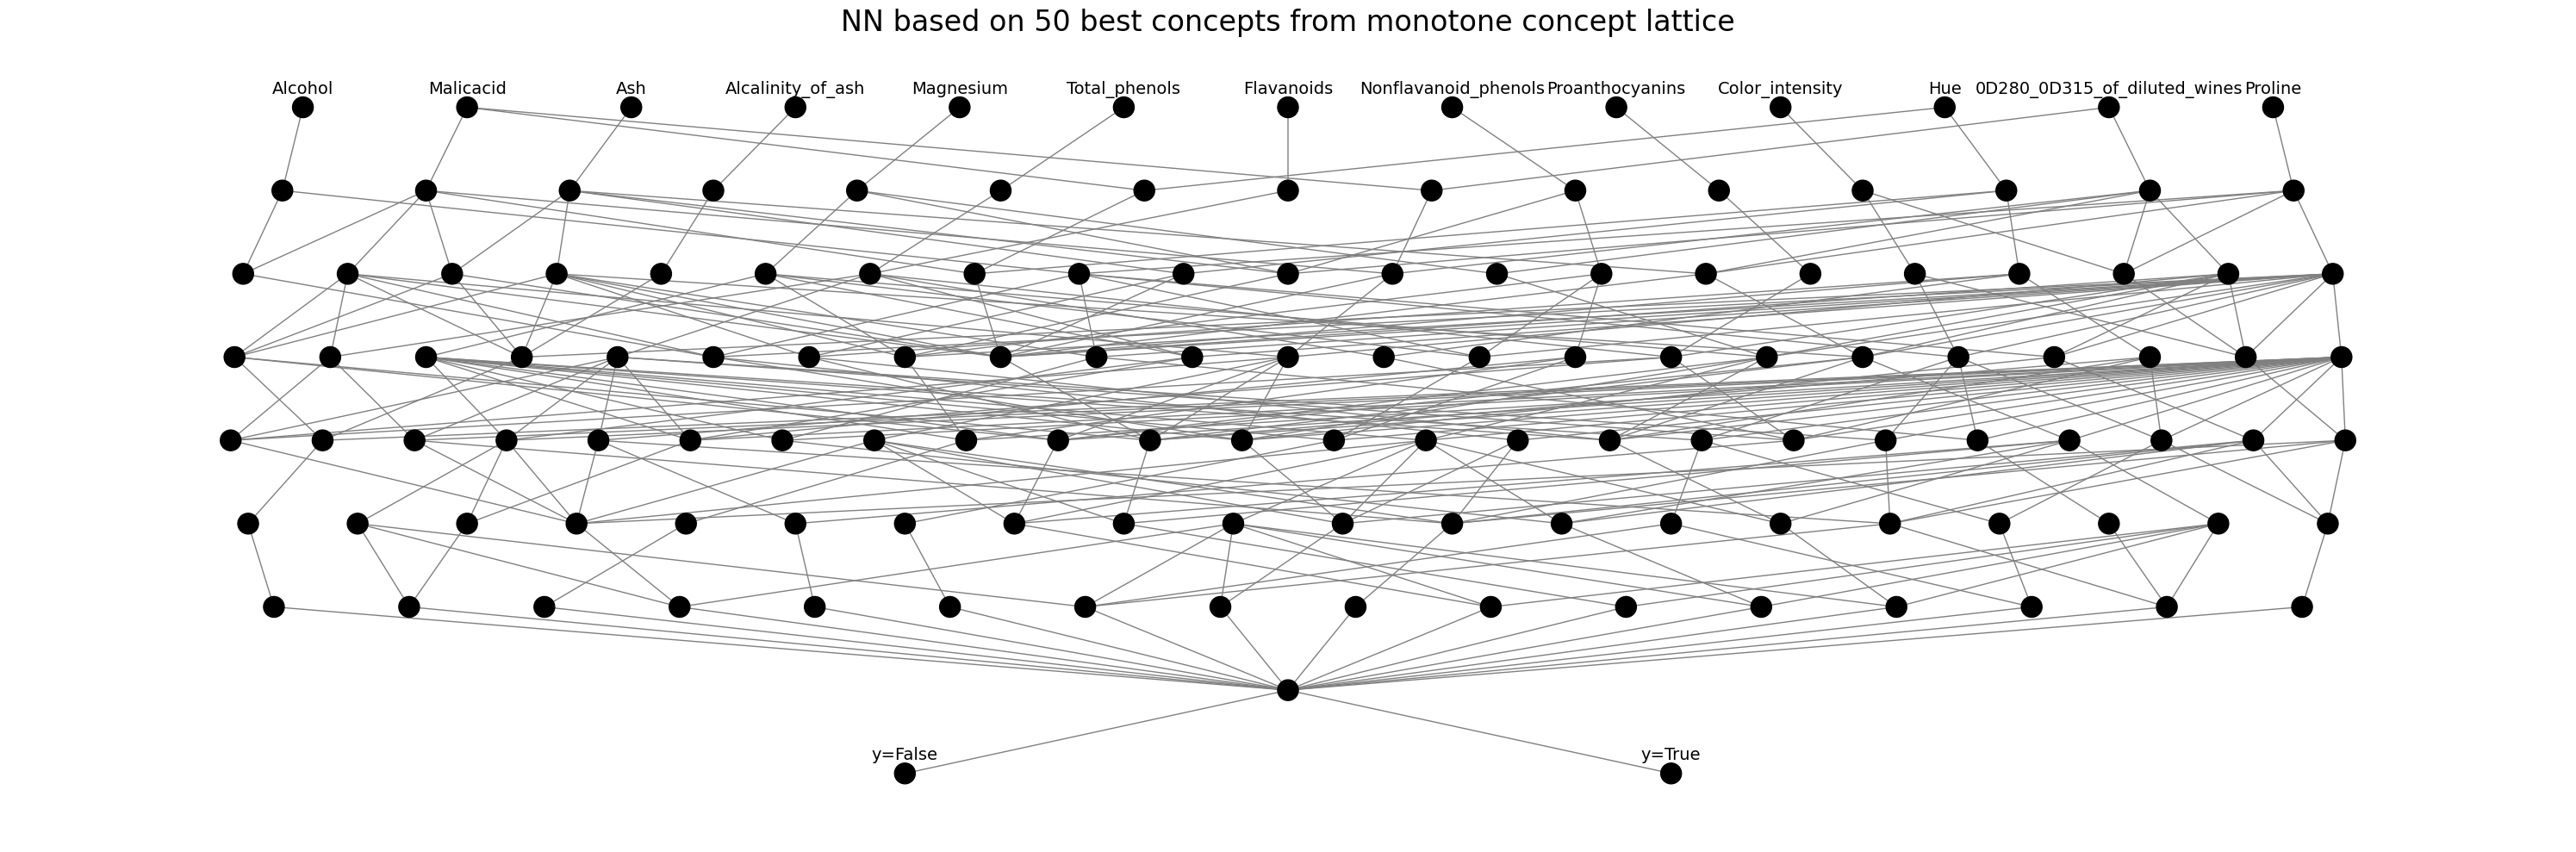

In [ ]:
fig, ax = plt.subplots(figsize=(30, 10))

vis.draw_poset(
    cn.poset, ax=ax, edge_color='grey',
    flg_node_indices=False,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes), only_new_attrs=True)+'\n\n',
    node_color='black',
)

plt.title(f'NN based on {concepts_count} best concepts from monotone concept lattice', loc='center', size=24)

plt.subplots_adjust()
plt.tight_layout()
plt.savefig('wine.png')
plt.show()

In [ ]:
import torch
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

cn = nl.ConceptNetwork.from_lattice(L, best_concepts, sorted(set(y_train)))
cn.fit(X_train, y_train,  n_epochs = 2000, nonlinearity=torch.nn.GELU)

In [ ]:
print('Class predictions \n', cn.predict(X_test).numpy().astype(bool))
print('True classes \n', y_test.values)

Class predictions 
 [ True  True False False  True  True  True False  True False False  True
 False False False False  True False False False False False  True False
 False False False False False False  True  True False  True  True False
 False  True False]
True classes 
 [ True  True False False  True  True  True False  True False  True  True
 False False False False  True False False False False False  True False
 False False False False False  True  True  True False  True  True False
 False  True False]


In [ ]:
print("F1 score =", f1_score(y_test.values, cn.predict(X_test).numpy()))

F1 score = 0.9333333333333333


In [ ]:
y_pred = cn.predict(X_test).numpy()
y_proba = cn.predict_proba(X_test).detach().numpy()

print('Recall score:', recall_score(y_test.values.astype('int'), y_pred))
print('F1 score:', f1_score(y_test.values.astype('int'), y_pred))
print('Accuracy score:', accuracy_score(y_test.values.astype('int'), y_pred))

Recall score: 0.875
F1 score: 0.9333333333333333
Accuracy score: 0.9487179487179487


In [ ]:
edge_weights = cn.edge_weights_from_network()

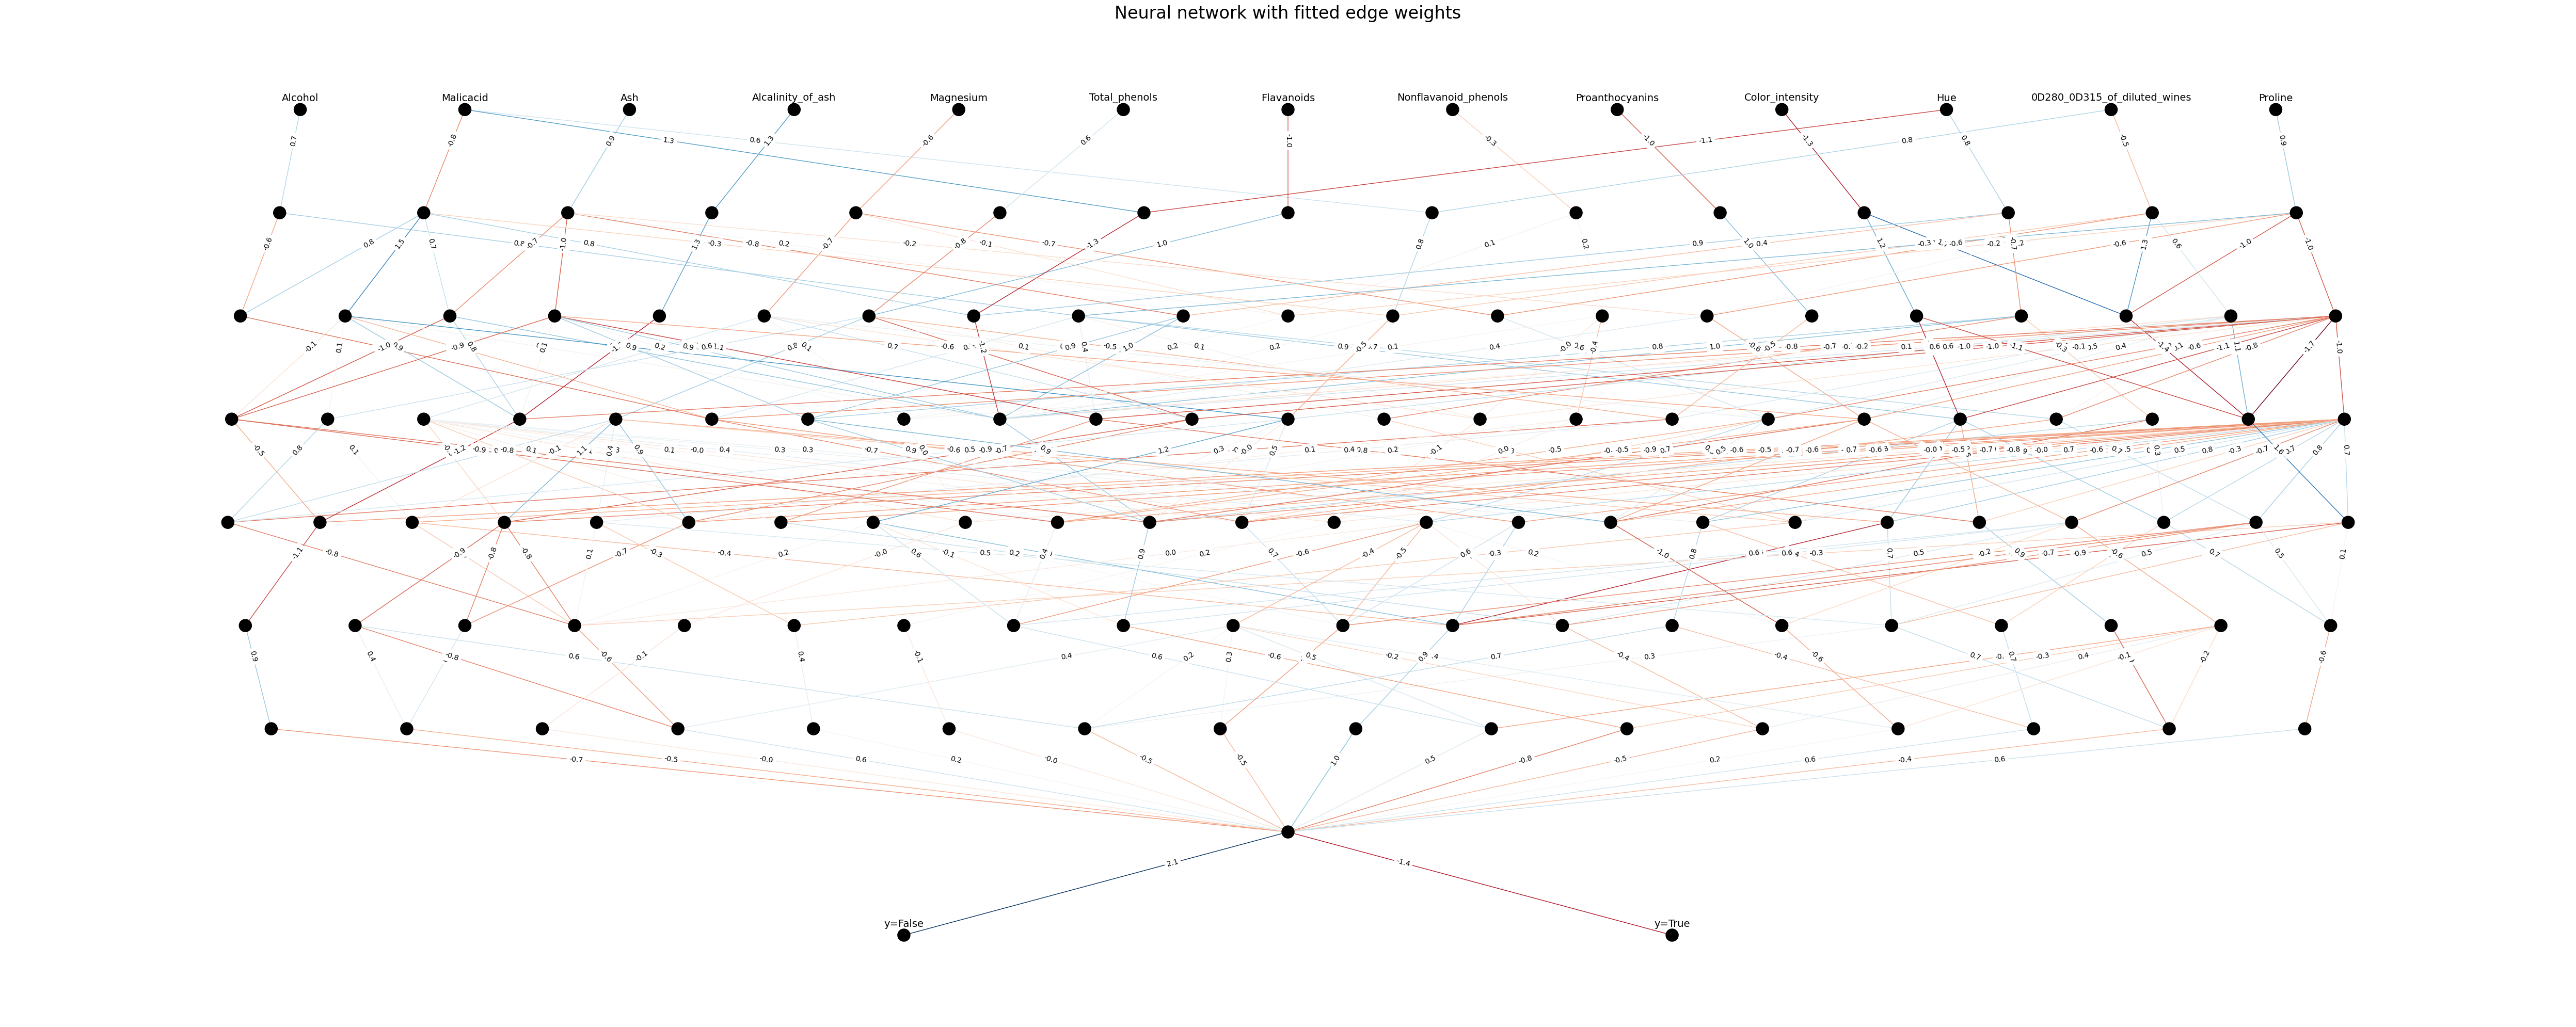

In [ ]:
import networkx as nx
fig, ax = plt.subplots(figsize=(50,20))

vis.draw_poset(
    cn.poset, ax=ax, node_color='black',
    flg_node_indices=False,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes), only_new_attrs=True)+'\n\n',
    edge_color=[edge_weights[edge] for edge in cn.poset.to_networkx().edges],
    edge_cmap=plt.cm.RdBu,
)
nx.draw_networkx_edge_labels(cn.poset.to_networkx(), vis.mover.pos, {k: f"{v:.1f}" for k,v in edge_weights.items()}, label_pos=0.7)

plt.title('Neural network with fitted edge weights', size=24, loc='center')
plt.tight_layout()
plt.subplots_adjust()
plt.savefig('wine_fitted.png')
plt.show()